In [47]:
import torch
import numpy as np
import pandas as pd

# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import torch.nn as nn
import torch.nn.functional as F



In [48]:
Data = pd.read_csv('/Users/akumaar/Downloads/All_popsong_feature_data.csv')
Data

,rank,num sections,num unique sections,intro or chorus beg,choruses,verses
0,0,7,4,1,3,2
1,0,10,5,0,5,3
2,0,12,6,1,8,2
3,0,10,5,1,6,2
4,0,5,5,0,1,1
...,...,...,...,...,...,...
301,1,6,5,0,2,1
302,1,9,4,1,6,2
303,1,9,3,1,7,2
304,1,9,5,1,5,2


In [49]:
TensorData = torch.tensor(Data.values)
feature_cols =['num sections', 'num unique sections', 'intro or chorus beg', 'choruses','verses']
X = Data[feature_cols] # Features
y = Data['rank'] # Target variable
train, test = train_test_split(Data, test_size=0.25, random_state=0)
trainset = torch.tensor(train.values)
testset = torch.tensor(test.values)
trainset = trainset.type(torch.float)
testset = testset.type(torch.float)
print(trainset)
#trainsetL = torch.utils.data.DataLoader(,batch_size = 10, shuffle = True)

tensor([[ 0., 10.,  5.,  0.,  5.,  3.],
        [ 1.,  6.,  3.,  1.,  3.,  2.],
        [ 0.,  8.,  0.,  0.,  0.,  0.],
        ...,
        [ 0.,  2.,  0.,  0.,  0.,  0.],
        [ 0., 10.,  5.,  1.,  7.,  2.],
        [ 0., 11.,  6.,  0.,  7.,  2.]])


In [102]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(5, 5)
        self.linear2 = nn.Linear(5, 1)
    
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        x = torch.sigmoid(x)
        return x

In [103]:
net = Net()
print(net)

Net(
  (linear1): Linear(in_features=5, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)


In [104]:
import torch.optim as optim
pos_weight = torch.tensor([270/83])
loss_function = nn.BCELoss()
weight = torch.tensor([.5,1])
optimizer = optim.Adam(net.parameters(), lr=.01)


In [105]:
x = trainset[:, 1:6]
y = trainset[:, 0:1]

net.train()
for epochs in range(40):
    for i in range(len(trainset)):
       # net.zero_grad()
        output = net(x[i])
        loss = loss_function(output, y[i])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



In [107]:
correct = 0
total = 0
xtest = testset[:, 1:6]
ytest = testset[:, 0:1]
ypreds = []
net.eval()
counter = [0,0]
with torch.no_grad():
    for i in range(len(testset)):
        output = net(xtest[i])
        if(output>.5):
            output = 1
            ypreds.append(output)
        else:
            output = 0
            ypreds.append(output)

        counter[int(ytest[i])] += 1
        if(output == ytest[i]):
                correct += 1
        total += 1
    print('accuracy:', correct/total, counter)
    
ypreds
print(ypreds)
print(ytest)

accuracy: 0.8051948051948052 [62, 15]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
  

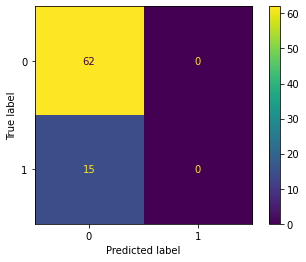

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(ytest,ypreds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()